<a href="https://colab.research.google.com/github/Harshini0601/House_Price_Prediction/blob/main/housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
Categorical variables: 3
Integer variables: 7
Float variables: 0


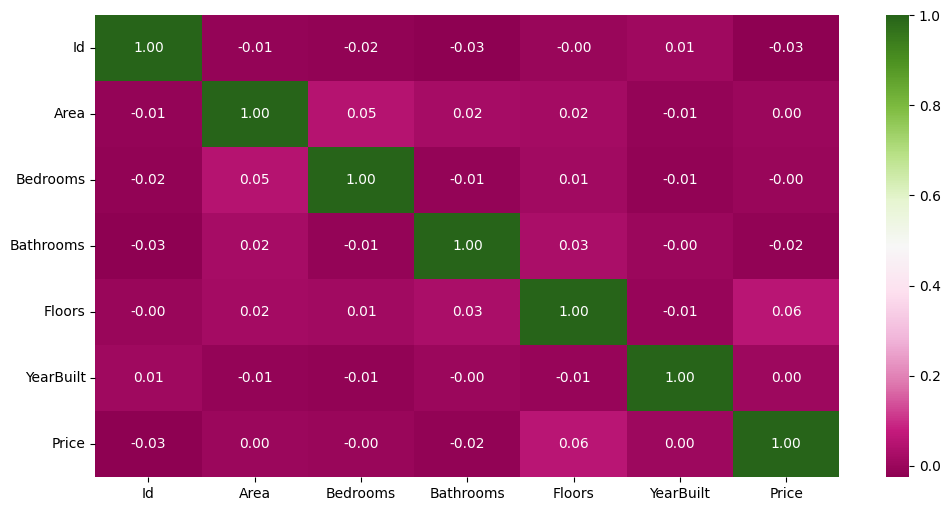

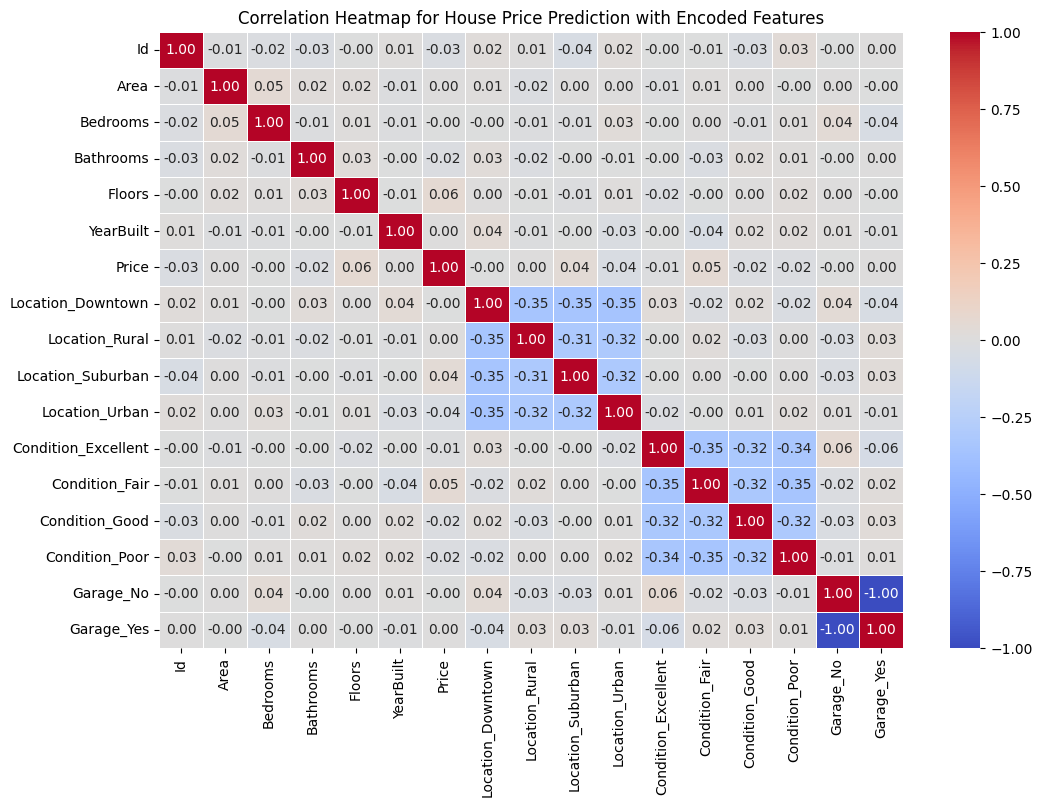

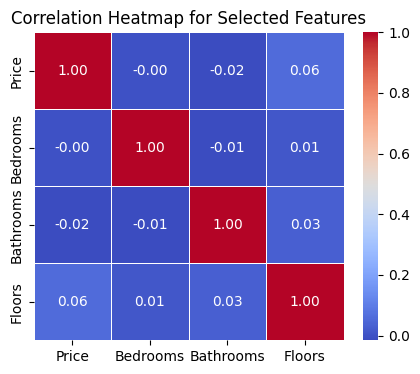

<ipython-input-9-615782ba2b80>:79: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


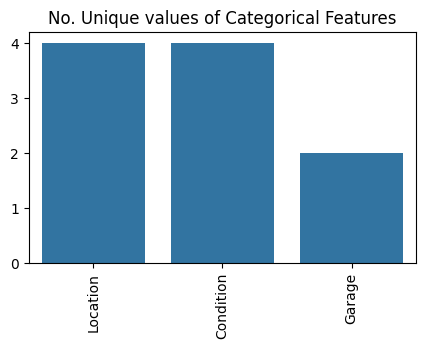

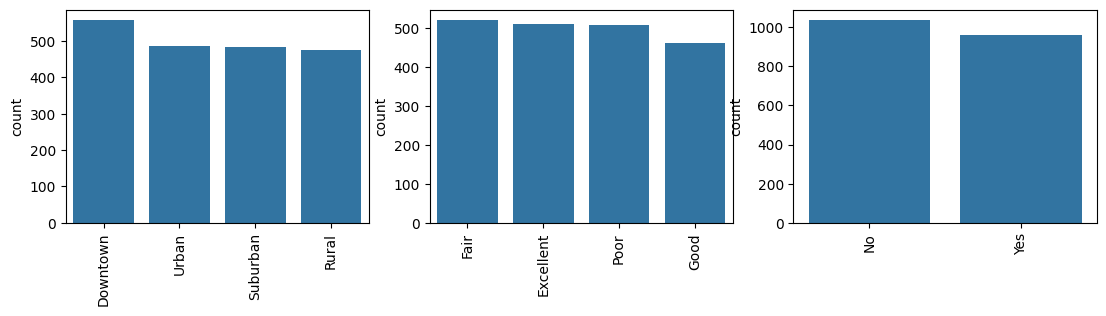

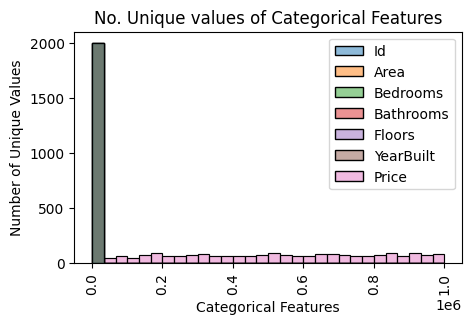

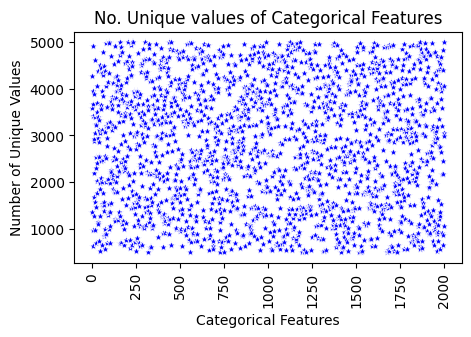

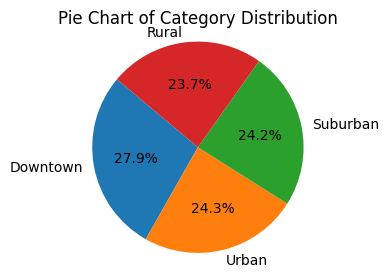

<ipython-input-9-615782ba2b80>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bedrooms', y='Price', data=dataset, palette='mako')


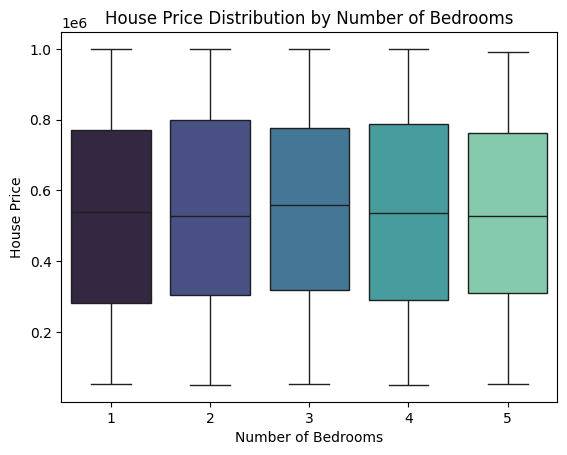

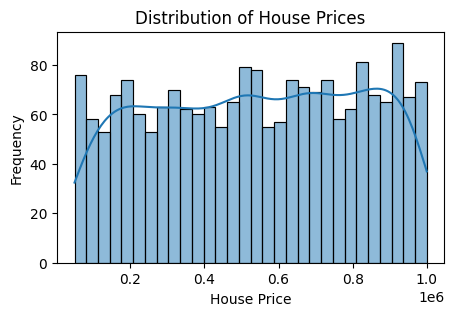

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv("Housing.csv")

# Printing first 5 records of the dataset
print(dataset.head(5))

#dimension
dataset.shape

#data processiong
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

#exploratory data analysis

# Drop non-numeric columns
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

# Plot heatmap again
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_dataset.corr(),
            cmap='PiYG',
            fmt='.2f',
            annot=True)
plt.show()


# One-hot encode categorical variables
dataset_encoded = pd.get_dummies(dataset)

# Plot the heatmap using the encoded dataset
plt.figure(figsize=(12, 8))
sns.heatmap(dataset_encoded.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for House Price Prediction with Encoded Features')
plt.show()

# Select a small number of features for the heatmap (e.g., 'Price', 'Bedrooms', 'Bathrooms', 'Size')
subset_data = dataset[['Price', 'Bedrooms', 'Bathrooms', 'Floors']]
# Adjust the column names as per your dataset

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(subset_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

#barplot
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(5,3))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

#barplot 4 features
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)

index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


# Histogram
plt.figure(figsize=(5, 3))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
column_data=dataset
sns.histplot(column_data, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Categorical Features')
plt.ylabel('Number of Unique Values')
plt.show()

#sctter plot
plt.figure(figsize=(5, 3))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.scatterplot(dataset['Area'], color='blue', marker='*')
plt.xlabel('Categorical Features')
plt.ylabel('Number of Unique Values')
plt.show()
category_counts = dataset['Location'].value_counts()

#  pie chart
plt.figure(figsize=(3, 3))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Boxplot to visualize house price distribution based on number of bedrooms
sns.boxplot(x='Bedrooms', y='Price', data=dataset, palette='mako')
sns.color_palette("mako", as_cmap=True)
plt.title('House Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.xticks(rotation=360)
plt.show()

plt.figure(figsize=(5, 3))

# Using Seaborn to plot a histogram
sns.histplot(dataset['Price'], bins=30, kde=True)

# Adding labels and title
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()